In [9]:
import numpy as np
import scanpy as sc
import pandas as pd

In [10]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()  # print version
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.5 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.10 pynndescent==0.5.4


In [28]:
adult_wc_path = '../data/adult_wc_T.csv'
adult_wc = sc.read_csv(adult_wc_path)

In [30]:
sc.pp.calculate_qc_metrics(adult_wc, percent_top=None, log1p=False, inplace=True)
# adult_wc.write_csvs('../results/logs2/qc_metrics/')

In [ ]:
adult_wc.X = (adult_wc.X / np.sum(adult_wc.X, axis=1).reshape(-1, 1)) * 1e6
pd.DataFrame(adult_wc.X).to_csv('../results/logs2/cpm/X.csv',header=adult_wc.var_names)

In [41]:
array = np.array([range(5),
                  range(5, 10),
                  range(10, 15)])
print(array)
array1 = (array / np.sum(array, axis=1).reshape(-1, 1))
print(array1)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[0.         0.1        0.2        0.3        0.4       ]
 [0.14285714 0.17142857 0.2        0.22857143 0.25714286]
 [0.16666667 0.18333333 0.2        0.21666667 0.23333333]]


In [29]:

sc.tl.pca(adult_wc, svd_solver='arpack', n_comps=20)
# sc.pl.pca(adult_wc, color='Lars2')

computing PCA
    with n_comps=20
    finished (0:00:01)


computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE


D:\anaconda\envs\scanpy0\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:03)


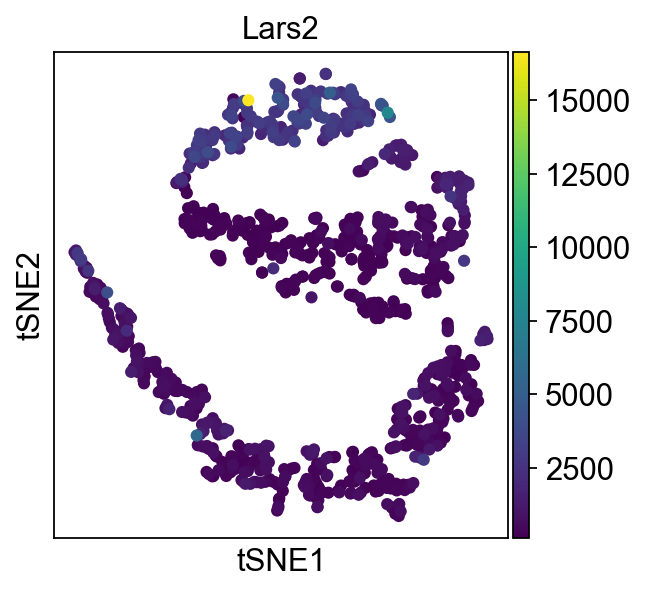

In [27]:
sc.pp.neighbors(adult_wc, n_neighbors=30, n_pcs=20)
sc.tl.tsne(adult_wc, perplexity=10)
sc.pl.tsne(adult_wc, color='Lars2')